#Part 1

In [1]:
import numpy as np
from matplotlib.colors import LogNorm
from Complex_plane import complex_plane
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'


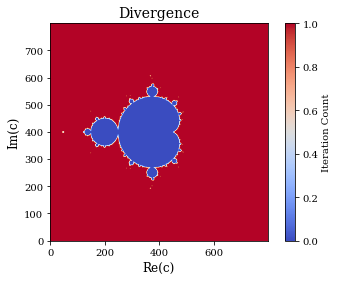

In [2]:


divergent, _ = complex_plane(max_iter=200)
plt.imshow(divergent, cmap='coolwarm', origin='lower')
plt.colorbar(label='Iteration Count')
plt.xlabel('Re(c)', fontsize=12)
plt.ylabel('Im(c)', fontsize=12)
plt.title('Divergence', fontsize=14)
plt.savefig('Complex_Plane_1.png')
plt.show()


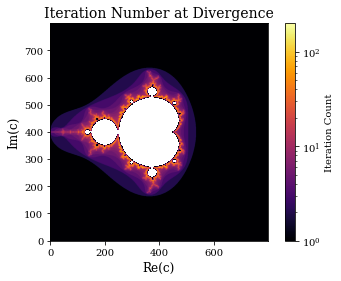

In [3]:
import matplotlib.pyplot as plt

_, iterations = complex_plane(max_iter=200)
plt.imshow(iterations, cmap='inferno', norm=LogNorm(), origin='lower')
plt.colorbar(label='Iteration Count')
plt.xlabel('Re(c)', fontsize=12)
plt.ylabel('Im(c)', fontsize=12)
plt.title('Iteration Number at Divergence', fontsize=14)
plt.savefig('Complex_Plane_2.png')
plt.show()


#Part 2

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Initial conditions and parameters
sigma, r, b = 10, 28, 8/3
W0 = [0,1,0]

def lorenz(t,W):
    """
    Lorenz system of equations:
    dx/dt = -sigma*(x-y)
    dy/dt = r*x - y - x*z
    dz/dt = -b*z + x*y
    
    Parameters:
    -----------
    t: float
        time
    W: array_like, shape(3,)
        x, y and z variables of Lorenz system
    sigma: float
        Prandtl number
    r: float
        Rayleigh number
    b: float
        Dimensionless length scale
    
    Returns:
    --------
    dW_dt: array_like, shape(3,)
        Derivatives of x, y and z variables
    """
    dX = -sigma*(W[0]-W[1])
    dY = r*W[0] - W[1] - W[0]*W[2]
    dZ = -b*W[2] + W[0]*W[1]
    return [dX,dY,dZ]

In [5]:
# Solve Lorenz system of equations using solve_ivp
sol = solve_ivp(lorenz, [0,60], W0, dense_output=True)

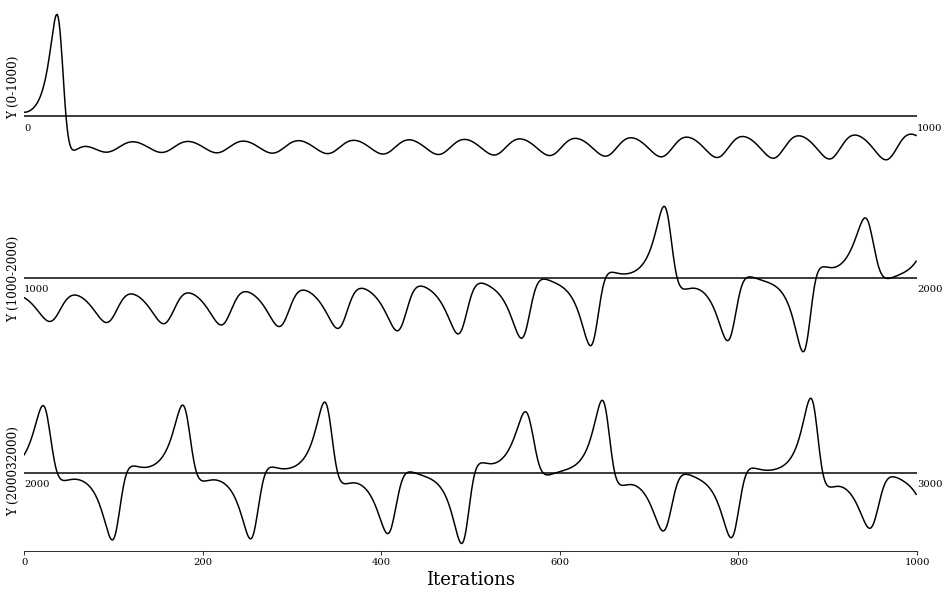

In [6]:
fig, ax = plt.subplots(3,1, figsize=(16, 10), sharex=True)

t = np.arange(0,10,0.01)
t1 = np.arange(0,1000)
W11 = sol.sol(t)
W12 = sol.sol(t+10)
W13 = sol.sol(t+20)

ax[0].axhline(0, color='k')
ax[1].axhline(0, color='k')
ax[2].axhline(0, color='k')

ax[0].plot(t1, W11.T[:,1], color='k')
ax[1].plot(t1, W12.T[:,1], color='k')
ax[2].plot(t1, W13.T[:,1], color='k')

ax[0].get_xaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
ax[0].set_yticks([])
ax[1].set_yticks([])
ax[2].set_yticks([])

ax[0].spines[['left', 'right', 'top', 'bottom']].set_visible(False)
ax[1].spines[['left', 'right', 'top', 'bottom']].set_visible(False)
ax[2].spines[['left', 'right', 'top']].set_visible(False)

ax[2].set_xlim(0,1000)

ax[0].annotate('0', (0,-4))
ax[1].annotate('1000', (0,-4))
ax[2].annotate('2000', (0,-4))
ax[0].annotate('1000', (1000,-4))
ax[1].annotate('2000', (1000,-4))
ax[2].annotate('3000', (1000,-4))

ax[0].set_ylabel('Y (0-1000)', fontsize=12)
ax[1].set_ylabel('Y (1000-2000)' , fontsize=12)
ax[2].set_ylabel('Y (200032000)', fontsize=12)
ax[2].set_xlabel('Iterations', fontsize=18)

plt.savefig('Lorenz_figure_1.png')
plt.show()

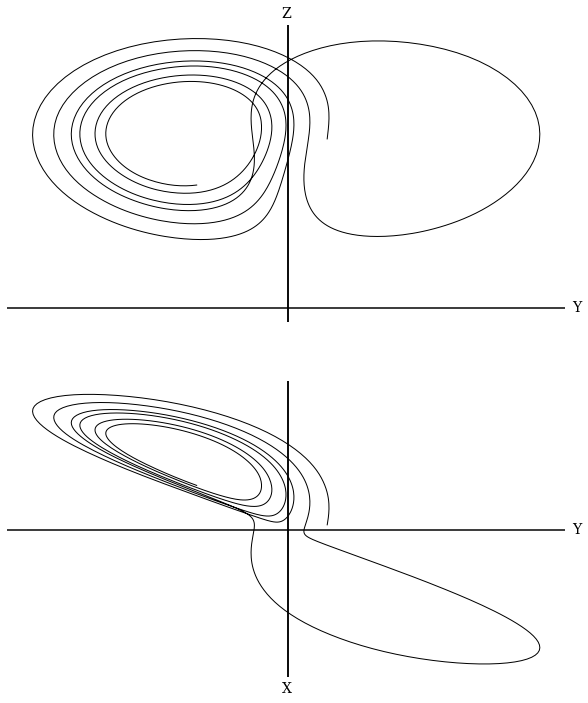

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

t = np.linspace(14, 19, 1000)
W = sol.sol(t)

ax[0].axhline(0, color='k')
ax[0].text(24, 0, 'Y', fontsize=14, ha='right', va='center')
ax[1].axhline(0, color='k')
ax[1].text(24, 0, 'Y', fontsize=14, ha='right', va='center')
ax[0].axvline(0, color='k')
ax[0].text(0.27, 45, 'Z', fontsize=14, ha='right', va='center')
ax[1].axvline(0, color='k')
ax[1].text(0.30, -19, 'X', fontsize=14, ha='right', va='center')


ax[0].axvline(0, color='k')
ax[1].axvline(0, color='k')

ax[0].set_xlabel('Y')
ax[1].set_xlabel('Y')
ax[0].set_ylabel('Z')
ax[1].set_ylabel('X')

ax[0].get_xaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

ax[0].spines[['left', 'right', 'top', 'bottom']].set_visible(False)
ax[1].spines[['left', 'right', 'top', 'bottom']].set_visible(False)

ax[0].plot(W.T[:, 1], W.T[:, 2], color='k', linewidth=1)
ax[1].plot(W.T[:, 1], -W.T[:, 0], color='k', linewidth=1)

plt.savefig('Lorenz_figure_2.png')
plt.show()


#Part 3

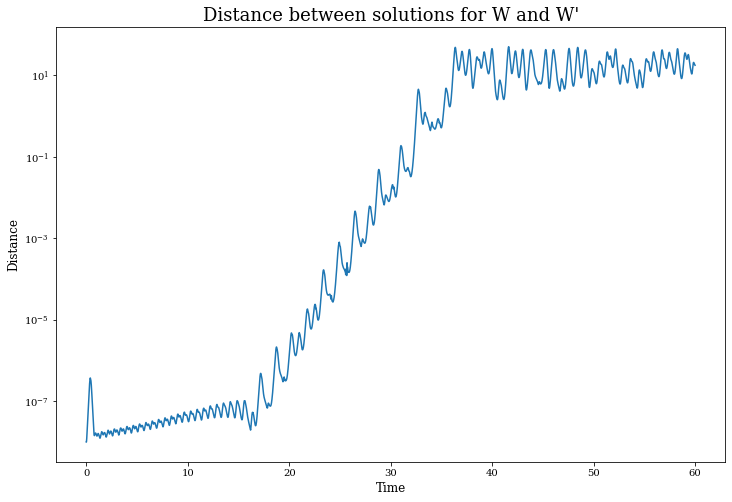

In [8]:
# Define initial conditions
W0 = [0, 1, 0]
W0_prime = [w + wp for w, wp in zip(W0, [0., 1.e-8, 0.])]

# Define time span for integration
t_span = [0, 60]

# Solve Lorenz system of equations for both initial conditions
sol = solve_ivp(lorenz, t_span, W0, t_eval=np.linspace(t_span[0], t_span[1], 10000))
sol_prime = solve_ivp(lorenz, t_span, W0_prime, t_eval=np.linspace(t_span[0], t_span[1], 10000))

# Calculate Euclidean distance between solutions at each time step
distance = np.sqrt(np.sum((sol.y - sol_prime.y)**2, axis=0))

# Plot distance as a function of time on a semilog plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.semilogy(sol.t, distance)
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Distance', fontsize=12)
ax.set_title('Distance between solutions for W and W\'', fontsize=18)
plt.savefig('New_initial_conditions.png')
plt.show()
